In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.metrics import r2_score

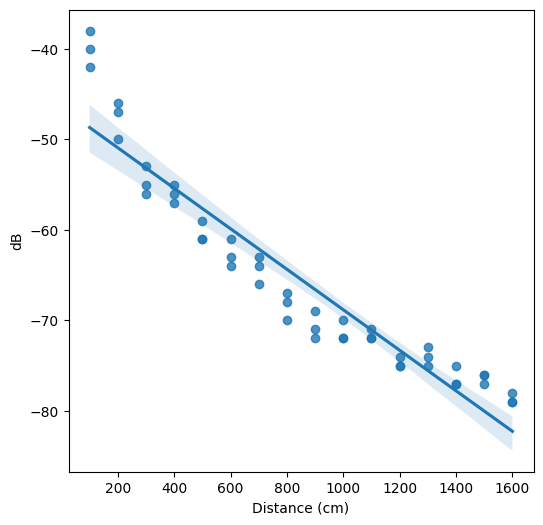

In [9]:
df = pd.read_csv('data.csv')
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(x='distance',y='decibel',data=df,ax=ax)
ax.set(ylabel='dB', xlabel='Distance (cm)');

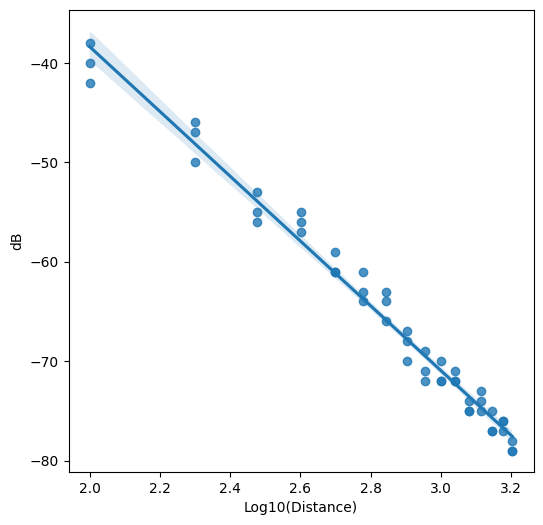

In [3]:
df['distance']=np.log10(df['distance'])
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(x='distance',y='decibel',data=df,ax=ax)
ax.set(ylabel='dB', xlabel='Log10(Distance)');

In [4]:
slope, intercept = np.polyfit(df['distance'], df['decibel'], 1)
print("Slope :",slope,"\nIntercept :",intercept)
print("Path loss exponent : ",abs(slope/10))
print("The r2 norm is",r2_score(df['decibel'],slope*df['distance']+intercept))


Slope : -32.5412990352722 
Intercept : 26.69532299989519
Path loss exponent :  3.2541299035272204
The r2 norm is 0.9813018268949326


In [5]:
x = np.array(df['distance'])
y = np.array(df['decibel'])

a, b = np.polyfit(x, y, 1)

z = []
sum = 0
for i in range(1,len(x)):
    z.append(a*x[i-1]+b - y[i-1])

print("Variance is ",np.var(z))


Variance is  2.224855733881004


In [6]:
n= 3.2541
P_d_0 = -39.756

readings = { 4:-59, 7:-66, 10: -72 ,13: -76, 16: -79.33}
error= 0.0
for dist in readings:
  readings[dist] =  np.round(pow(10,(P_d_0 - readings[dist])/(10*n)), decimals=5) 
  print('Estimated distance calculated from given strength at actual distance ', dist, 'metres is', readings[dist], 'metres.\nError at actual distance ', dist, 'metres is', np.round(abs(readings[dist]-dist), decimals=5))
  error += abs(readings[dist]-dist)

error/=5
print('Avg error over 5 samples in the distance calculation is:', np.round(error, decimals=5), 'metres')

Estimated distance calculated from given strength at actual distance  4 metres is 3.90281 metres.
Error at actual distance  4 metres is 0.09719
Estimated distance calculated from given strength at actual distance  7 metres is 6.40457 metres.
Error at actual distance  7 metres is 0.59543
Estimated distance calculated from given strength at actual distance  10 metres is 9.79204 metres.
Error at actual distance  10 metres is 0.20796
Estimated distance calculated from given strength at actual distance  13 metres is 12.99556 metres.
Error at actual distance  13 metres is 0.00444
Estimated distance calculated from given strength at actual distance  16 metres is 16.44854 metres.
Error at actual distance  16 metres is 0.44854
Avg error over 5 samples in the distance calculation is: 0.27071 metres
